# Bias-Variance Trade-Off - Lab

## Introduction

In this lab, you'll practice your knowledge on the bias-variance trade-off!

## Objectives

You will be able to: 
- Look at an example where Polynomial regression leads to overfitting
- Understand how bias-variance trade-off relates to underfitting and overfitting

## Let's get started!

In this lab, you'll try to predict some movie revenues based on certain factors, such as ratings and movie year.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


In [2]:
# Only keep four predictors and transform the with MinMaxScaler

scale = MinMaxScaler()
df = df[[ "domgross", "budget", "imdbRating", "Metascore", "imdbVotes"]]
transformed = scale.fit_transform(df)
pd_df = pd.DataFrame(transformed, columns = df.columns)
pd_df.head()

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,domgross,budget,imdbRating,Metascore,imdbVotes
0,0.055325,0.034169,0.839506,0.500000,0.384192
1,0.023779,0.182956,0.000000,0.000000,0.000000
2,0.125847,0.066059,1.000000,1.000000,1.000000
3,0.183719,0.252847,0.827160,0.572917,0.323196
4,0.233625,0.157175,0.925926,0.645833,0.137984


## Split the data into a test and train set

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train, test = train_test_split(pd_df)

## Fit a regression model to the training data and look at the coefficients

In [5]:
from statsmodels.formula.api import ols

In [6]:
outcome = 'domgross'
x_cols = list(pd_df.columns)
x_cols.remove(outcome)

In [7]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               domgross   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     2.346
Date:                Fri, 19 Jul 2019   Prob (F-statistic):             0.0959
Time:                        10:07:04   Log-Likelihood:                 8.0353
No. Observations:                  22   AIC:                            -6.071
Df Residuals:                      17   BIC:                           -0.6155
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0901      0.220     -0.409      0.688      -0.555       0.375
budget         0.6782      0.278      2.435      0.026       0.091       1.266
imdbRating    -0.0493      0.266     -0.185      0.855      -0.611       0.513
Metascore      0.2496      0.297      0.841      0.412      -0.377       0.876
imdbVotes      0.1037      0.260      0.399      0.695      -0.444       0.652
==============================================================================
Omnibus:                       28.303   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.910
Skew:                           2.254   Prob(JB):                     7.23e-13
Kurtosis:                       9.377   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot the training predictions against the actual data (y_hat_train vs. y_train)

Let's plot our result for the train data. Because we have multiple predictors, we can not simply plot the income variable X on the x-axis and target y on the y-axis. Lets plot 
- A line showing the diagonal of y_train. The actual y_train values are on this line
- Next, make a scatter plot that takes the actual y_train on the x-axis and the predictions using the model on the y-axis. You will see points scattered around the line. The horizontal distances between the points and the lines are the errors.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
predictions = model.predict(test)

In [10]:
predictions

5     0.647403
1     0.033982
19    0.455102
11    0.091792
15    0.189060
26    0.596467
12    0.159542
24    0.081099
dtype: float64

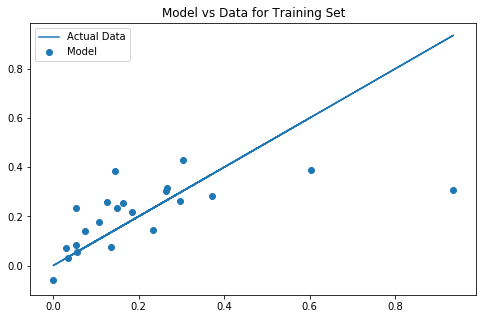

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(train[outcome], model.predict(train), label='Model')
plt.plot(train[outcome], train[outcome], label='Actual Data')
plt.title('Model vs Data for Training Set')
plt.legend();

## Plot the test predictions against the actual data (y_hat_test vs. y_test)

Do the same thing for the test data.

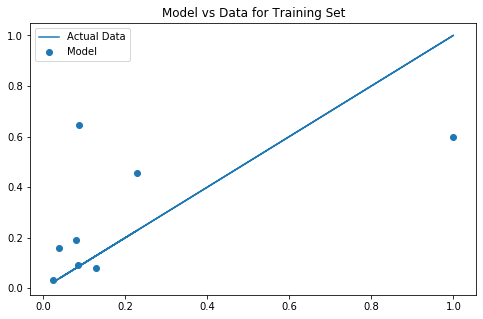

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(test[outcome], model.predict(test), label='Model')
plt.plot(test[outcome], test[outcome], label='Actual Data')
plt.title('Model vs Data for Training Set')
plt.legend();

## Calculate the bias
Create a function `bias` to calculate the bias of a models predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  


In [13]:
import numpy as np
def bias(y, y_hat):
    return np.mean(y_hat - y)

## Calculate the variance
Create a function `variance` to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [14]:
def variance(y_hat):
    return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2

## Use your functions to calculate the bias and variance of your model. Do this separately for the train and test sets.

In [15]:
b = bias(train[outcome], model.predict(train)) 
v = variance(model.predict(train)) 
print('Bias: {} \nVariance: {}'.format(b,v))

Bias: -2.0312034882346614e-16 
Variance: 0.015570584530426076


In [16]:
b = bias(test[outcome], model.predict(test)) 
v = variance(model.predict(test)) 
print('Bias: {} \nVariance: {}'.format(b,v))

Bias: 0.07261635806947209 
Variance: 0.053007396108959104


## Describe in words what these numbers can tell you.

Your description here (this cell is formatted using markdown)  
The bias here is low and the variance is low as well for both the train and test, though the train is better so there is a difference between them

## Overfit a new model by creating additional features by raising current features to various powers.

Use `PolynomialFeatures` with degree 3. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

$ \text{Budget} * \text{MetaScore} ^ 2 $

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape`. Quite a few!


In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
X_test = test.drop(outcome, axis=1)
X_test.head()

,budget,imdbRating,Metascore,imdbVotes
5,1.000000,0.777778,0.291667,0.239554
1,0.182956,0.000000,0.000000,0.000000
19,0.521640,0.814815,0.635417,0.703467
11,0.088838,0.888889,0.604167,0.141173
15,0.111617,0.913580,0.885417,0.264784


In [27]:
X_train = train.drop(outcome, axis=1)

In [34]:
y_test = test[outcome]
y_train = train[outcome]

In [43]:
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [44]:
np.shape(X_train_poly)

(22, 35)

In [49]:
from sklearn.linear_model import *
linreg = LinearRegression()

In [50]:
linreg.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Plot your overfitted model's training predictions against the actual data

Text(0.5, 1.0, 'Model vs Data for Training Set')

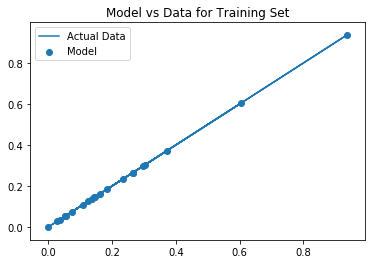

In [55]:
plt.plot(y_train, y_train, label='Actual Data')
plt.scatter(y_train, linreg.predict(X_train_poly), label='Model')
plt.legend()
plt.title('Model vs Data for Training Set')

Wow, we almost get a perfect fit!

## Calculate the bias and variance for the train set

In [53]:
b = bias(y_train, linreg.predict(X_train_poly)) 
v = variance(linreg.predict(X_train_poly)) 
print('Bias: {} \nVariance: {}'.format(b,v))

Bias: 1.8867483333260475e-15 
Variance: 0.04377257063032246


## Plot your overfitted model's test predictions against the actual data.

Text(0.5, 1.0, 'Model vs Data for Test Set')

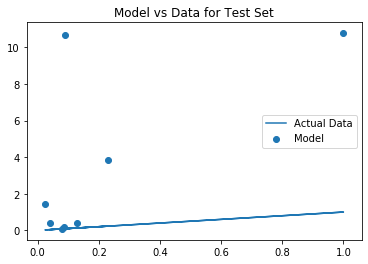

In [56]:
plt.plot(y_test, y_test, label='Actual Data')
plt.scatter(y_test, linreg.predict(X_test_poly), label='Model')
plt.legend()
plt.title('Model vs Data for Test Set')

##  Calculate the bias and variance for the train set.

In [57]:
b = bias(y_test, linreg.predict(X_test_poly)) 
v = variance(linreg.predict(X_test_poly)) 
print('Bias: {} \nVariance: {}'.format(b,v))

Bias: 3.2665010250453617 
Variance: 18.973452539592973


## Describe what you notice about the bias and variance statistics for your overfit model

Your description here (this cell is formatted using markdown)  
Bias is 3, not sure how big that is but by the plot it is probably off by a lot.  The variance is very high as can also been seen on the plot

## Level Up - Optional

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by just adding a few polynomials. Feel free to experiment and see how bias and variance improve!

In [58]:
poly2 = PolynomialFeatures(2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.fit_transform(X_test)

In [59]:
linreg.fit(X_train_poly2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5, 1.0, 'Model vs Data for Training Set 2')

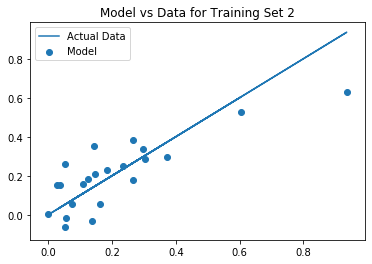

In [60]:
plt.plot(y_train, y_train, label='Actual Data')
plt.scatter(y_train, linreg.predict(X_train_poly2), label='Model')
plt.legend()
plt.title('Model vs Data for Training Set 2')

In [63]:
b = bias(y_train, linreg.predict(X_train_poly2)) 
v = variance(linreg.predict(X_train_poly2)) 
print('Bias: {} \nVariance: {}'.format(b,v))

Bias: 8.818703343329369e-16 
Variance: 0.02956078976306714


Text(0.5, 1.0, 'Model vs Data for Test Set 2')

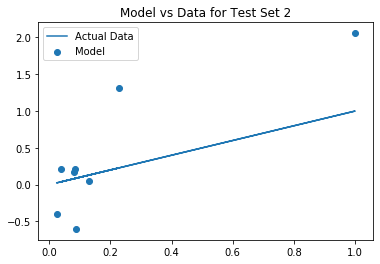

In [61]:
plt.plot(y_test, y_test, label='Actual Data')
plt.scatter(y_test, linreg.predict(X_test_poly2), label='Model')
plt.legend()
plt.title('Model vs Data for Test Set 2')

In [62]:
b = bias(y_test, linreg.predict(X_test_poly2)) 
v = variance(linreg.predict(X_test_poly2)) 
print('Bias: {} \nVariance: {}'.format(b,v))

Bias: 0.1675272210000505 
Variance: 0.6828573054741832


Both the bias and the variance go down with lower amounts of poly features

## Summary

This lab gave you insight into how bias and variance change for a training and a test set by using a pretty "simple" model, and a very complex model. 